Cold Start Recommendation System - works best if a business is setting up its website for the first time and does not have user-item purchase/rating history to start with initally

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
data = pd.read_csv('home_depot_data.csv')

In [8]:
data.shape

(2551, 14)

In [7]:
# List of columns 
columns = ['product_id', 'description']
# Drop columns that are not in columns_to_keep
df = data.drop(data.columns.difference(columns), axis=1)
df = df.loc[:, columns].dropna()
df.head(5)

,product_id,description
0,310090686,"This heavyweight, water-repellent hooded sweat..."
1,206724580,If you need more length between your existing ...
2,310347105,Polyester cover resembling rich Italian tapest...
3,312338711,It features a rectangle shape. This vessel set...
4,308561619,This 9 in. black full grain leather logger boo...


In [9]:
# taking subset of descriptions
description_data = df.head(500)
description_data['description'].head(15)

0     This heavyweight, water-repellent hooded sweat...
1     If you need more length between your existing ...
2     Polyester cover resembling rich Italian tapest...
3     It features a rectangle shape. This vessel set...
4     This 9 in. black full grain leather logger boo...
5     With robust structure and sophisticated canvas...
6     BEHR PRO i300 Semi-Gloss Interior Paint has a ...
7     DEWALT High Performance 0.045 in. Metal Cuttin...
8     This Ring Bar Cart is sure to make a statement...
9     This transitional vanity table proudly display...
10    Its easy to add a decorative touch to your hom...
11    BEHR PREMIUM PLUS Interior Paint & Primer offe...
12    BlindsAvenue light filtering cellular shades w...
13    Luverne SlimGrip truck running boards combine ...
14    Our Rustic Collection is an instant classic. R...
Name: description, dtype: object

Feature Extraction

In [10]:
# extracting the numerical features from the text in product description
vectorizer = TfidfVectorizer(stop_words='english')
vectorized_data = vectorizer.fit_transform(description_data["description"])
vectorized_data 

<500x4472 sparse matrix of type '<class 'numpy.float64'>'
	with 20425 stored elements in Compressed Sparse Row format>

Clustering the product description using K-Means

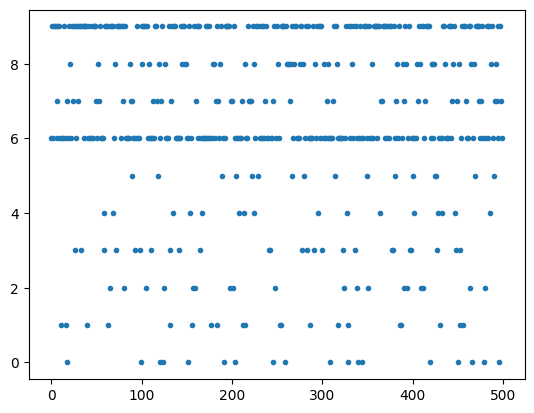

In [11]:
X = vectorized_data 

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [16]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

# clustering
k = 10
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

# Top words in each cluster based on product description
print("Top terms in each cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print_cluster(i)

Top terms in each cluster:
Cluster 0:
 wood
 rustic
 beams
 real
 products
 authentic
 timber
 faux
 cost
 collection
Cluster 1:
 glidden
 diamond
 results
 paint
 delivers
 essentials
 achieve
 smart
 exceptional
 primer
Cluster 2:
 plus
 premium
 stains
 paint
 finish
 resists
 mildew
 hide
 low
 exceptional
Cluster 3:
 exterior
 home
 look
 light
 door
 style
 paint
 finish
 latex
 doors
Cluster 4:
 brake
 power
 kit
 cord
 head
 led
 line
 built
 road
 element3
Cluster 5:
 superior
 use
 latex
 properly
 prepared
 spray
 paint
 professional
 drywall
 pro
Cluster 6:
 rug
 rugs
 collection
 area
 room
 design
 home
 soft
 decor
 living
Cluster 7:
 water
 mat
 set
 rod
 place
 steel
 glass
 fatigue
 dishes
 anti
Cluster 8:
 coat
 drying
 colors
 hide
 scuff
 longer
 time
 stain
 technology
 best
Cluster 9:
 paint
 primer
 label
 details
 stain
 ultra
 behr
 coat
 blocking
 needed


Prediction


In [17]:
# from the search words it predict the specific cluster it belong to
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    pred = model.predict(Y)
    #print(prediction)
    print_cluster(pred[0])

In [18]:
show_recommendations("room decor")

Cluster 6:
 rug
 rugs
 collection
 area
 room
 design
 home
 soft
 decor
 living


In [19]:
show_recommendations("spray paint")

Cluster 3:
 exterior
 home
 look
 light
 door
 style
 paint
 finish
 latex
 doors


Once the system identifies a cluster corresponding to the user's search words, it can recommend items from that cluster by analyzing product descriptions.